In [1]:
from observational_fear.load import load_traces
from pathlib import Path 
import pandas as pd
from neurobox.generics import select_cols

DATA_DIR = Path(r"E:\OFL\one-p experiment\data")
FIG_DIR = Path(r"C:\Users\roryl\repos\observational-fear\data")

In [10]:
import numpy as np
from binit.bin import which_bin, which_bin_idx
from binit.align import align_around
from observational_fear.events import get_block_starts

SESSION = "day2"
block = "US"
bins = get_block_starts(SESSION, block)
df_traces = load_traces(DATA_DIR, SESSION).set_index("time")
df_responders = pd.read_csv(DATA_DIR / "day2-block-responders.csv")

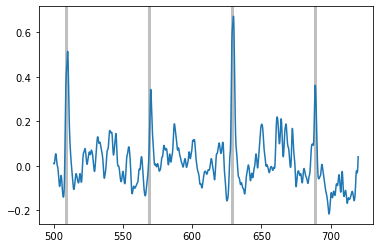

In [45]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt


block = "US"
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05)]["new_id"].values.astype(str).tolist()
duration = 2
_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(zscore)
    .apply(gaussian_filter1d, sigma=4)
    .mean(axis=1)
    .loc[lambda x: (x.index >=500) & (x.index <= 720)]
)
ax.plot(dfp.index, dfp.values)


for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots US 2 mins time.svg")


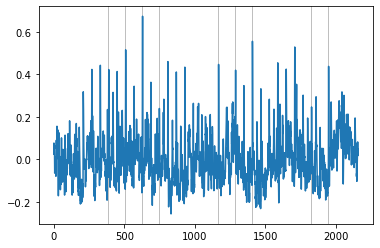

In [46]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt


block = "US"
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05)]["new_id"].values.astype(str).tolist()
duration = 2
_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(zscore)
    .apply(gaussian_filter1d, sigma=4)
    .mean(axis=1)
)
ax.plot(dfp.index, dfp.values)


for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots US 2 all time.svg")


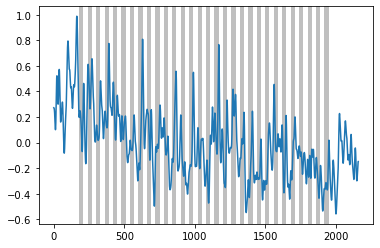

In [44]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt


block = "CS"
duration = 30
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05)]["new_id"].values.astype(str).tolist()

_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(gaussian_filter1d, sigma=40)
    .apply(zscore)
    .mean(axis=1)
)
ax.plot(dfp.index, dfp.values)
for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots CS all time.svg")


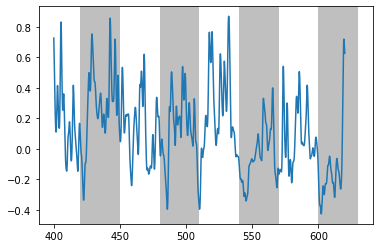

In [47]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt


block = "CS"
duration = 30
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05) & (x.diff_of_medians > 0)]["new_id"].values.astype(str).tolist()

_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(gaussian_filter1d, sigma=4)
    .apply(zscore)
    .mean(axis=1)
    .loc[lambda x: (x.index >=400) & (x.index <= 620)]
)
ax.plot(dfp.index, dfp.values)
for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots CS 2 mins time.svg")


In [48]:
SESSION = "day4"
block = "US"
bins = get_block_starts(SESSION, block)
df_traces = load_traces(DATA_DIR, SESSION).set_index("time")
df_responders = pd.read_csv(DATA_DIR / "day4-block-responders.csv")

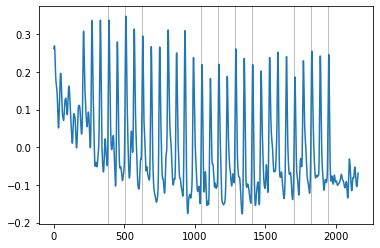

In [53]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

duration = 2
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05)]["new_id"].values.astype(str).tolist()

_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(gaussian_filter1d, sigma=40)
    .apply(zscore)
    .mean(axis=1)
)
ax.plot(dfp.index, dfp.values)
for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots US Day4 all time.svg")


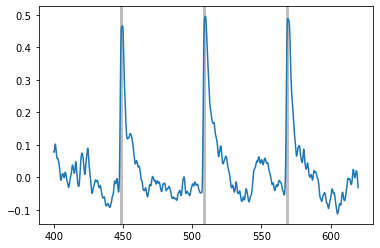

In [54]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

duration = 2
bins = get_block_starts(SESSION, block)
responders =df_responders.loc[lambda x: (x.block == block) & (x.p < 0.05)]["new_id"].values.astype(str).tolist()

_, ax = plt.subplots()
dfp = (
    select_cols(df_traces, responders)
    .dropna()
    .apply(gaussian_filter1d, sigma=4)
    .apply(zscore)
    .mean(axis=1)
    .loc[lambda x: (x.index >=400) & (x.index <= 620)]

)
ax.plot(dfp.index, dfp.values)
for bin in bins[(bins >= np.min(dfp.index)) & (bins <= np.max(dfp.index))]:
    ax.axvspan(bin, bin+duration, facecolor='0.5', alpha=0.5)

plt.savefig(FIG_DIR / "lineplots US Day4 2 mins.svg")
